<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/AVL_Tree_Construction_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AVL Tree Contruction

- AVL tree is self-balancing BST
- Anaother similar tree is red-black tree

In [ ]:
class node:
    def __init__(self, num):
        self.value = num
        self.left = None
        self.right = None
        self.height = 1

class AVL:
    def height(self, Node):
        if Node is None:
            return 0
        else:
            return Node.height

    def balance(self, Node):
        if Node is None:
            return 0
        else:
            return self.height(Node.left) - self.height(Node.right)

    def MinimumValueNode(self, Node):
        if Node is None or Node.left is None:
            return Node
        else:
            return self.MinimumValueNode(Node.left)

    def rotateR(self, Node):
        a = Node.left
        b = a.right
        a.right = Node
        Node.left = b
        Node.height = 1 + max(self.height(Node.left), self.height(Node.right))
        a.height = 1 + max(self.height(a.left), self.height(a.right))
        return a

    def rotateL(self, Node):
        a = Node.right
        b = a.left
        a.left = Node
        Node.right = b
        Node.height = 1 + max(self.height(Node.left), self.height(Node.right))
        a.height = 1 + max(self.height(a.left), self.height(a.right))
        return a

    def insert(self, val, root):
        if root is None:
            return node(val)
        elif val <= root.value:
            root.left = self.insert(val, root.left)
        elif val > root.value:
            root.right = self.insert(val, root.right)
        root.height = 1 + max(self.height(root.left), self.height(root.right))
        balance = self.balance(root)
        if balance > 1 and root.left.value > val:
            return self.rotateR(root)
        if balance < -1 and val > root.right.value:
            return self.rotateL(root)
        if balance > 1 and val > root.left.value:
            root.left = self.rotateL(root.left)
            return self.rotateR(root)
        if balance < -1 and val < root.right.value:
            root.right = self.rotateR(root.right)
            return self.rotateL(root)
        return root

    def preorder(self, root):
        if root is None:
            return
        print(root.value, end=' ')
        self.preorder(root.left)
        self.preorder(root.right)
        return ' '

    def delete(self, val, Node):
        if Node is None:
            return Node
        elif val < Node.value:
            Node.left = self.delete(val, Node.left)
        elif val > Node.value:
            Node.right = self.delete(val, Node.right)
        else:
            if Node.left is None:
                lt = Node.right
                Node = None
                return lt
            elif Node.right is None:
                lt = Node.left
                Node = None
                return lt
            rgt = self.MinimumValueNode(Node.right)
            Node.value = rgt.value
            Node.right = self.delete(rgt.value, Node.right)

        Node.height = 1 + max(self.height(Node.left), self.height(Node.right))
        balance = self.balance(Node)
        if balance > 1 and self.balance(Node.left) >= 0:
            return self.rotateR(Node)
        if balance < -1 and self.balance(Node.right) <= 0:
            return self.rotateL(Node)
        if balance > 1 and self.balance(Node.left) < 0:
            Node.left = self.rotateL(Node.left)
            return self.rotateR(Node)
        if balance < -1 and self.balance(Node.right) > 0:
            Node.right = self.rotateR(Node.right)
            return self.rotateL(Node)
        return Node

In [ ]:
Tree = AVL()
rt = None
rt = Tree.insert(3, rt)
rt = Tree.insert(5, rt)
rt = Tree.insert(7, rt)
print("PREORDER")
print(Tree.preorder(rt))
rt = Tree.insert(1, rt)
rt = Tree.insert(2, rt)
print("PREORDER")
print(Tree.preorder(rt))
rt = Tree.insert(4, rt)
rt = Tree.insert(6, rt)
rt = Tree.delete(7, rt)
rt = Tree.insert(8, rt)
rt = Tree.insert(9, rt)
print("PREORDER")
print(Tree.preorder(rt))
rt = Tree.delete(3, rt)
print("PREORDER")
print(Tree.preorder(rt))

PREORDER
5 3 7  
PREORDER
5 2 1 3 7  
PREORDER
3 2 1 5 4 8 6 9  
PREORDER
4 2 1 8 5 6 9  


# Conceptual Note

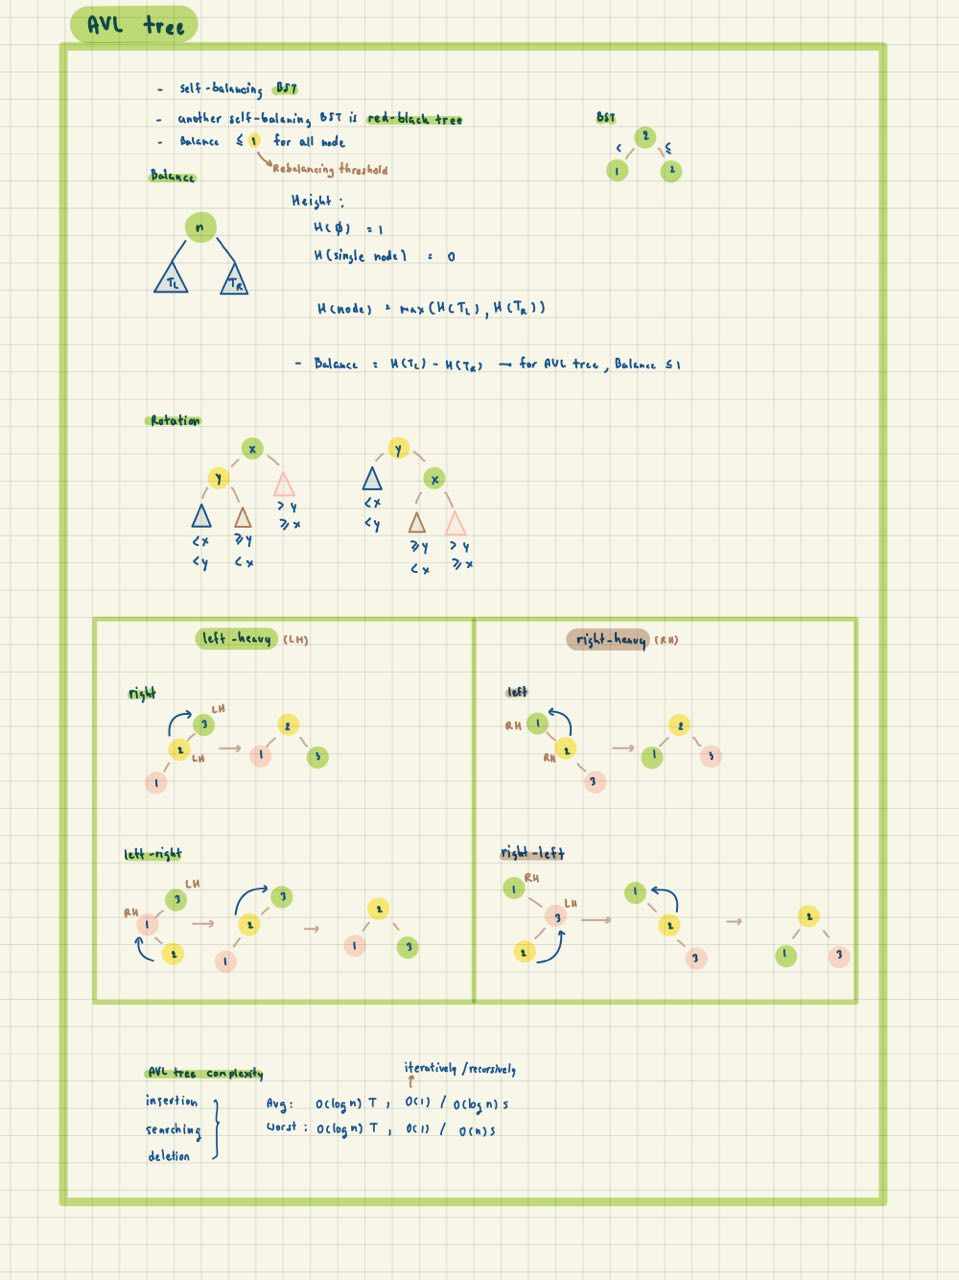